Numeric columns: 38
Categorical columns: 43

Model Performance:
Mean Squared Error: 4268741247.14
R² Score: 0.44


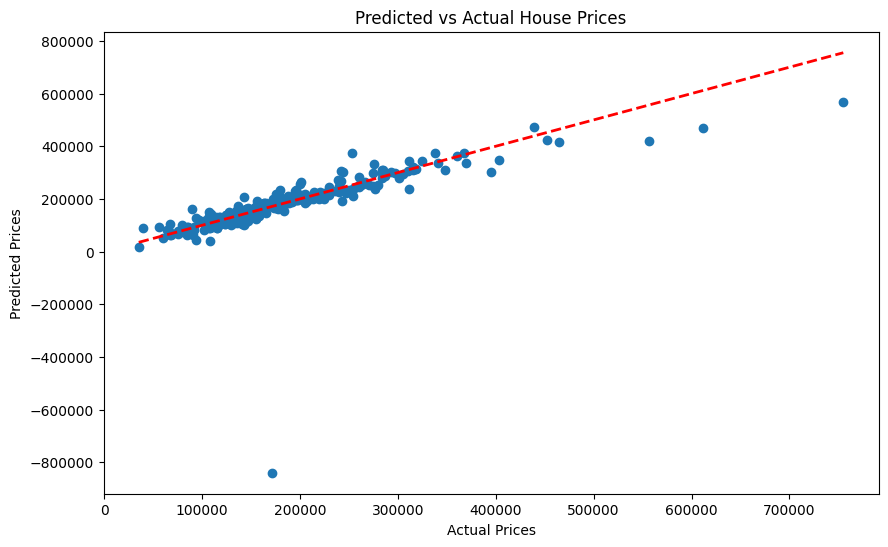

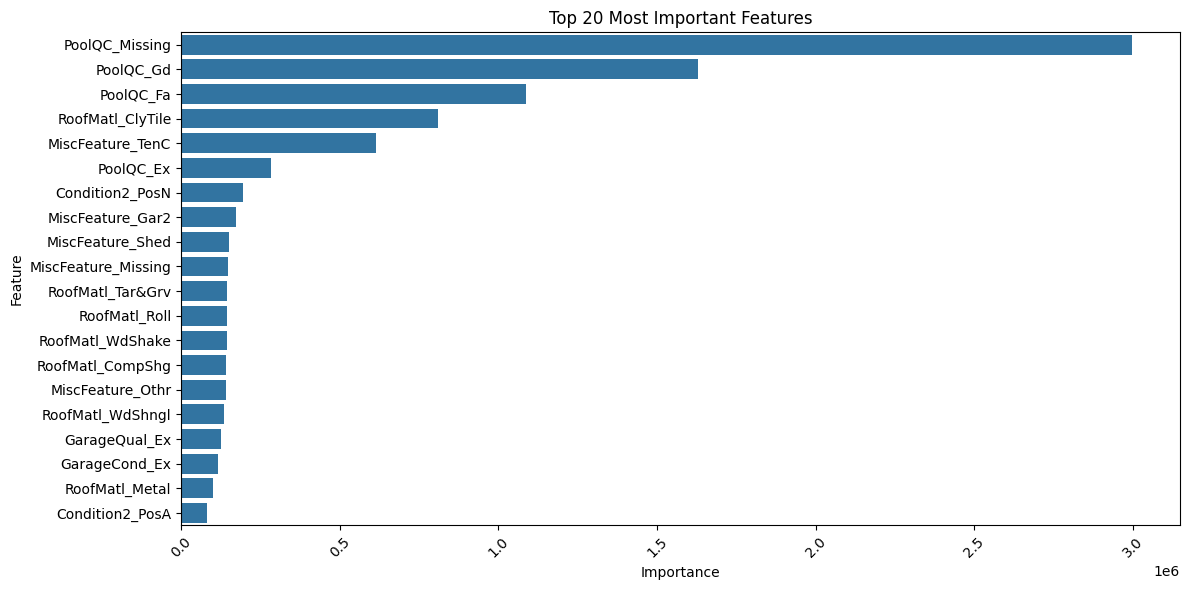

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('train.csv')

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("Numeric columns:", len(numeric_columns))
print("Categorical columns:", len(categorical_columns))

# Handle numeric missing values
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Handle categorical missing values
data[categorical_columns] = data[categorical_columns].fillna('Missing')

# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Prepare features and target
X = data_encoded.drop('SalePrice', axis=1)
y = data_encoded['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()

# Feature importance (top 20 features)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 20 Most Important Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()